# Fisher Linear Discriminant

In this exercise, you will apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates three data matrices of size (1528, 7), (1307, 7), and (1342, 7) corresponding to the three classes in the dataset: *male (M)*, *female (F)*, and *infant (I)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots various projections of the data: (1) projection on the first dimension of the data, and (2) projection on a random direction.

(1528, 7) (1307, 7) (1342, 7)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


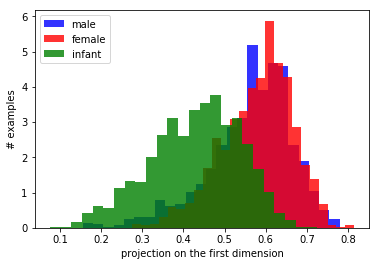

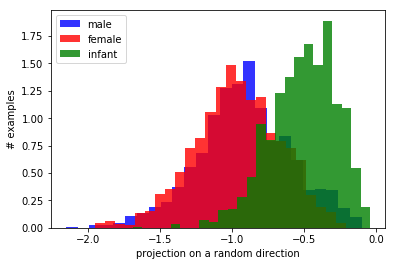

In [2]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.M.shape,abalone.F.shape, abalone.I.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension')

# Project data on a random direction
w2 = numpy.random.normal(0,1,[7])
w2 /= (w2**2).sum()**.5
abalone.plot(w2,'projection on a random direction')

## Implementation (30 P)

* **Create a method `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a method `J(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a method `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


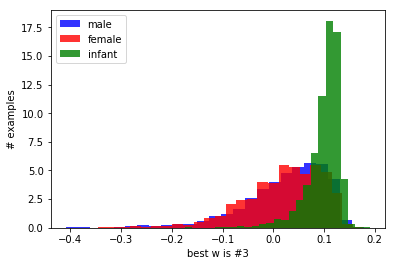

('best find (J, w)',
 0.03423982870368994,
 array([-0.0485556 ,  0.8520931 , -0.38194111, -0.11487175, -0.21615371,
        -0.25618799, -0.01226619]))

In [3]:
def covs(X1, X2):
    # class means
    m1 = X1.mean(axis=0)
    m2 = X2.mean(axis=0)
    # between class covariance matrix
    S_B = numpy.outer((m2 - m1), (m2 - m1).T)
    # withing class covariance matrix
    S_W = numpy.cov(X1.T) + numpy.cov(X2.T)
    return S_B, S_W

def fisher(X1, X2):
    # get covariance matricies
    S_B, S_W = covs(X1, X2)
    
    S_Bhalf = S_B**(1/2)
    lam, w = numpy.linalg.eig(S_Bhalf*numpy.linalg.inv(S_W)*S_Bhalf)
    #lam, w = numpy.linalg.eig(numpy.linalg.inv(S_W)*S_B)
    return w

def J(w, X1, X2):
    # get covariance matricies
    S_B, S_W = covs(X1, X2)
    #print(w.shape, X1.shape, X2.shape)

    return w.T.dot(S_B.dot(w)) / w.T.dot(S_W.dot(w))

def phi(X):
    return numpy.concatenate((X, numpy.outer(X, X).flatten()))


ws = fisher(abalone.M, abalone.F)
js = numpy.apply_along_axis(J, axis=0, arr=ws, X1=abalone.M, X2=abalone.F)
wmax_i = js.argmax(axis=0)
abalone.plot(ws[wmax_i],'best w is #'+str(wmax_i))
"best find (J, w)", js[wmax_i], ws[wmax_i]

#for i, w in enumerate(ws):
#    abalone.plot(w,'w #'+str(i))

## Analysis (20 P)

* **Print the value of `J(w)` for each discriminated pair of classes (M/F, M/I, F/I), and for several values of `w`:**

  * `w` is a vector that projects the data on the each dimension of the data.
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the difference between the mean vectors of the two classes (after quadratic expansion of the data).
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).


* **For the simple Fisher linear discriminant, plot a histogram of the projected data for each discriminated pair of classes using the function `utils.Abalone.plot()`.**

w      M/F      M/I      F/I
--------------------------------------------------
Dimension         0.01744     0.79748     1.18848     
Dimension         0.01962     0.85463     1.28500     
Dimension         0.01564     0.84217     0.95390     
Dimension         0.00746     1.03398     1.41669     
Dimension         0.00197     0.88378     1.16349     
Dimension         0.01117     1.02292     1.43094     
Dimension         0.01221     0.97206     1.31373     
--------------------------------------------------
Means Linear      0.00840     1.02690     1.41719     
Means Quadratic   0.01405     1.23943     1.77187     
--------------------------------------------------
Fischer Linear    0.03424     1.03864     1.43399     
Fischer Quadratic 0.03843     1.06101     1.43170     

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


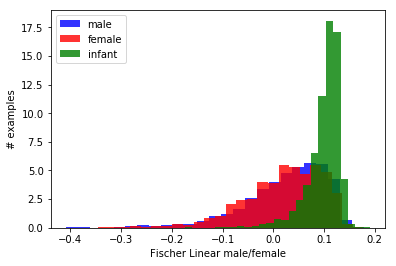

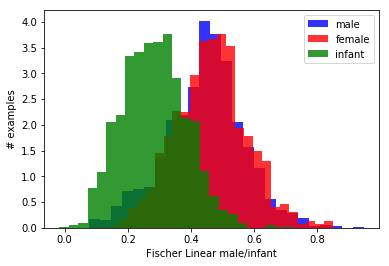

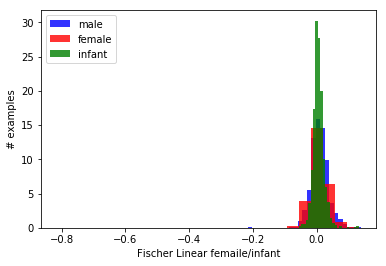

In [39]:
pairs = [((abalone.M, abalone.F)), (abalone.M, abalone.I), (abalone.F, abalone.I)]
pair_names = ["male/female", "male/infant", "femaile/infant"]

print("w      M/F      M/I      F/I")
print("-"*50)
ws = numpy.eye(abalone.M.shape[1])
for w in ws:
    print("Dimension", end=" "*9)
    
    for pair in pairs:
        # vector that projects the data on each dimension
        print("{0:.5f}".format(J(w,  *pair)), end=" "*5)
    print("")

print("-"*50)
print("Means Linear", end=" "*6)
for pair in pairs:
    # w is difference between means
    m1 = pair[0].mean(axis=0)
    m2 = pair[1].mean(axis=0)
    w = m1 - m2
    print("{0:.5f}".format(J(w,  *pair)), end=" "*5)
print("")

print("Means Quadratic", end=" "*3)
for pair in pairs:
    # w is difference between means (after quad expansion)
    quad_pair = (numpy.apply_along_axis(phi, axis=0, arr=pair[0]), numpy.apply_along_axis(phi, axis=0, arr=pair[1]))
    m1 = quad_pair[0].mean(axis=0)
    m2 = quad_pair[1].mean(axis=0)
    w = m1 - m2
    print("{0:.5f}".format(J(w,  *quad_pair)), end=" "*5)

print("")
print("-"*50)
print("Fischer Linear", end=" "*4)
for pair in pairs:
    # fisher linear discriminant
    ws = fisher(*pair)
    js = numpy.apply_along_axis(J, axis=0, arr=ws, X1=pair[0], X2=pair[1])
    print("{0:.5f}".format(js.max(axis=0)), end=" "*5)

print("")
print("Fischer Quadratic", end=" ")
for pair in pairs:
    # fisher linear discriminant (after quad expansion)
    quad_pair = (numpy.apply_along_axis(phi, axis=0, arr=pair[0]), numpy.apply_along_axis(phi, axis=0, arr=pair[1]))
    ws = fisher(*quad_pair)
    js = numpy.apply_along_axis(J, axis=0, arr=ws, X1=pair[0], X2=pair[1])
    print("{0:.5f}".format(js.max(axis=0)), end=" "*5)

for pair in pairs:
    # fisher linear discriminant
    ws = fisher(*pair)
    wmax_i = numpy.apply_along_axis(J, axis=0, arr=ws, X1=pair[0], X2=pair[1]).argmax(axis=0)
    abalone.plot(ws[wmax_i], 'Fischer Linear '+pair_names.pop(0))
